In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pylab as plt

In [2]:
#Use this to load the files from your computer to colab
from google.colab import files
files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


{'international-airline-passengers.csv': b'"Month","International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"\r\n"1949-01",112\r\n"1949-02",118\r\n"1949-03",132\r\n"1949-04",129\r\n"1949-05",121\r\n"1949-06",135\r\n"1949-07",148\r\n"1949-08",148\r\n"1949-09",136\r\n"1949-10",119\r\n"1949-11",104\r\n"1949-12",118\r\n"1950-01",115\r\n"1950-02",126\r\n"1950-03",141\r\n"1950-04",135\r\n"1950-05",125\r\n"1950-06",149\r\n"1950-07",170\r\n"1950-08",170\r\n"1950-09",158\r\n"1950-10",133\r\n"1950-11",114\r\n"1950-12",140\r\n"1951-01",145\r\n"1951-02",150\r\n"1951-03",178\r\n"1951-04",163\r\n"1951-05",172\r\n"1951-06",178\r\n"1951-07",199\r\n"1951-08",199\r\n"1951-09",184\r\n"1951-10",162\r\n"1951-11",146\r\n"1951-12",166\r\n"1952-01",171\r\n"1952-02",180\r\n"1952-03",193\r\n"1952-04",181\r\n"1952-05",183\r\n"1952-06",218\r\n"1952-07",230\r\n"1952-08",242\r\n"1952-09",209\r\n"1952-10",191\r\n"1952-11",172\r\n"1952-12",194\r\n"1953-01",196\r\n"1953-02",196\r\n"1953-03",236\r

In [11]:
#Convert array-matrix
def create_data_base(data, look_backward):
  data_x,data_y = [],[]
  for i in range(len(data)-look_backward-1):
    a = data[i:(i+look_backward),0]
    data_x.append(a)
    data_y.append(data[i+look_backward,0])
  return np.array(data_x), np.array(data_y)

In [5]:
#Load data
df = pd.read_csv('international-airline-passengers.csv', usecols=[1],engine='python', skipfooter=3)
data = df.values
data = data.astype('float32')

In [6]:
#normalize data
scaled = MinMaxScaler(feature_range=(0,1))#scale between 0 and 1
data = scaled.fit_transform(data)

In [7]:
#split dataset
train_size = int(len(data)*0.67)
test_size = len(data)-train_size
training, test = data[0:train_size,:],data[train_size:len(data),:]

In [47]:
#Look backward
look_backward = 10 #How much will our model look backward
#Create the database based on how much we will look backward
train_x, train_y = create_data_base(training, look_backward)
test_x, test_y = create_data_base(test, look_backward)
#Reshape the arrays to fit the LSTM 
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x  = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [48]:
#LSTM Network
inputs=tf.keras.layers.Input(shape=(1,look_backward))
x=tf.keras.layers.LSTM(10)(inputs)
#x=tf.keras.layers.GRU(10)(inputs)#1 cell with 10 GRU units inside
x=tf.keras.layers.Dense(1)(x)
model= tf.keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
history = model.fit(train_x, train_y, epochs=100, batch_size=1, verbose = 2)

Epoch 1/100
85/85 - 1s - loss: 0.0305 - 1s/epoch - 17ms/step
Epoch 2/100
85/85 - 0s - loss: 0.0060 - 117ms/epoch - 1ms/step
Epoch 3/100
85/85 - 0s - loss: 0.0046 - 126ms/epoch - 1ms/step
Epoch 4/100
85/85 - 0s - loss: 0.0039 - 128ms/epoch - 2ms/step
Epoch 5/100
85/85 - 0s - loss: 0.0035 - 130ms/epoch - 2ms/step
Epoch 6/100
85/85 - 0s - loss: 0.0031 - 129ms/epoch - 2ms/step
Epoch 7/100
85/85 - 0s - loss: 0.0030 - 126ms/epoch - 1ms/step
Epoch 8/100
85/85 - 0s - loss: 0.0029 - 128ms/epoch - 2ms/step
Epoch 9/100
85/85 - 0s - loss: 0.0029 - 126ms/epoch - 1ms/step
Epoch 10/100
85/85 - 0s - loss: 0.0028 - 122ms/epoch - 1ms/step
Epoch 11/100
85/85 - 0s - loss: 0.0026 - 122ms/epoch - 1ms/step
Epoch 12/100
85/85 - 0s - loss: 0.0026 - 129ms/epoch - 2ms/step
Epoch 13/100
85/85 - 0s - loss: 0.0023 - 123ms/epoch - 1ms/step
Epoch 14/100
85/85 - 0s - loss: 0.0025 - 132ms/epoch - 2ms/step
Epoch 15/100
85/85 - 0s - loss: 0.0024 - 121ms/epoch - 1ms/step
Epoch 16/100
85/85 - 0s - loss: 0.0023 - 127ms/epoc

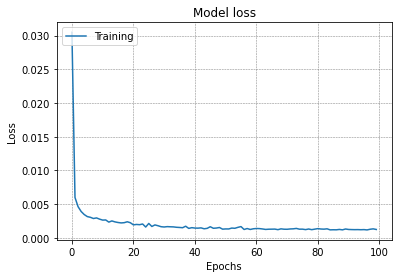

In [50]:
plt.figure(1)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training'], loc='upper left')

In [51]:
#Predictions
prediction_training = model.predict(train_x)
prediction_test = model.predict(test_x)

In [52]:
#Invert the prediction to compute the error
prediction_training = scaled.inverse_transform(prediction_training)
train_y = scaled.inverse_transform([train_y])
prediction_test = scaled.inverse_transform(prediction_test)
test_y = scaled.inverse_transform([test_y])

In [54]:
import math
#Compute the RMSE
training_points = math.sqrt(mse(train_y[0,:], prediction_training[:,0]))
test_points = math.sqrt(mse(test_y[0,:], prediction_test[:,0]))
print('Training points: %.2f RMSE And Test points: %.2f RMSE' %(training_points, test_points))
#This show the number of passengers that we are missing 
#The real result would be the predicted result +- this error

Training points: 18.08 RMSE And Test points: 39.57 RMSE


In [55]:
# Displace training predictions
plot_training_prediction = np.empty_like(data)
plot_training_prediction[:, :] = np.nan
plot_training_prediction[look_backward:len(prediction_training)+look_backward, :] = prediction_training


In [56]:
#Displace test predictions
plot_test_prediction = np.empty_like(data)
plot_test_prediction[:, :] = np.nan
plot_test_prediction[len(prediction_training)+(look_backward*2)+1:len(data)-1, :] = prediction_test

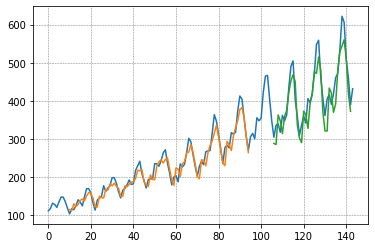

In [57]:
# Show predictions and data
plt.figure(2)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(scaled.inverse_transform(data))
plt.plot(plot_training_prediction)
plt.plot(plot_test_prediction)
plt.show()